# Анализ сервиса аренды самокатов GoFast

Вы аналитик популярного сервиса аренды самокатов GoFast. Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:



без подписки

абонентская плата отсутствует;

стоимость одной минуты поездки — 8 рублей;

стоимость старта (начала поездки) — 50 рублей;

с подпиской Ultra

абонентская плата — 199 рублей в месяц;

стоимость одной минуты поездки — 6 рублей;

стоимость старта — бесплатно.

# Цель иследования:
1. Подсчёт выручки:

   1) найдите суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.
   
   2) Найти и добавить в датафрейм помесячную выручку, которую принёс каждый пользователь.
   
2. Проверить три гепотизы:

   1) Важно понять, тратят ли пользователи с подпиской больше времени на поездки?
   
   2) Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?
   
   3) Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.


# Ход иследования

В основных данных есть информация о пользователях, их поездках и подписках.
Пользователи — users_go.csv
Поездки — rides_go.csv
Подписки — subscriptions_go.csv
Данные о аренды самокатов GoFast хранятся на датафреймах. О качестве данных нам ничего неизвестно. Поэтому предед тем как приступать надо найти и по возможности испаривть ошибки, которы не приведут к икажению. Создадим не обходимые столбцы и приступим к цели иследования

Обзор данных

Сделаем предобработку данных

Исследовательский анализ данных

Объединение данных


Откроем файл с данными и изучим общую информацию.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn
from scipy import stats as st

#### Шаг 1. Загрузка данных



Загрузка данных

In [ ]:
users = pd.read_csv('/datasets/users_go.csv')
rides = pd.read_csv('/datasets/rides_go.csv')
subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')


1.2 Изучаем общую информацию

In [ ]:
users.head(10)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


In [ ]:
rides.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [ ]:
subscriptions.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


Просмотрели исходные данные, изучим их глубже что-бы увидеть полную иноформацию в данных, найти и исправить по возможности ошибки.

Все таблицы связаны между собой
в 1 таблице указан город и номер ползователя, а также информация о подписки
в 2 таблице есть иноформация о длительности времени и расстояние которое предодолел пользователь и дата начала
в 3 таблице указана информация о тарифах. Ставки за начало поездки и стоимость минуты

#### Шаг 2. Предобработка данных

Посмотрим таблицу users

In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [ ]:
# обработка пропусков (посмотрим количесвто пропусков)
users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [ ]:
# поиск дубликатов
users.duplicated().sum()

31

мы можем заметить что в таблице есть посторяющие значения, удалим их

In [ ]:
# удаляем все дубликаты
users = users.drop_duplicates()

In [ ]:
# проверяем
users['user_id'].duplicated().sum()

0

посмотрим таблицу rides

In [ ]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [ ]:
# преобразуем столбец 'date' к формату datetime
rides['date'] = pd.to_datetime(rides['date'],  format='%Y-%m-%d')

In [ ]:
rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
dtype: int64

In [ ]:
# посмотрим на дубликаты в этой таблице
rides.duplicated().sum()

0

В данной таблице нету пропусков и дубликатов.

Преобразуем формат даты и добавим столец с месяцами

In [ ]:
# сначала проверим за какой год у нас представленны данные
rides['date'].dt.year.unique()

array([2021])

In [ ]:
# создадим столбец со значением месяца
rides['month'] = rides['date'].dt.month

In [ ]:
rides['month'].head()

0    1
1    1
2    4
3    8
4    8
Name: month, dtype: int64

In [ ]:
rides.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


Посмотим таблицу subscriptions

In [ ]:
subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


In [ ]:
subscriptions.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [ ]:
subscriptions.duplicated().sum()

0

Пропусков в таблицах нет

Были обнаружены дубликаты в таблице users, удалили.

Добавили столбец с номером месяца, провреили за какой год у нас данные в таблице. за 2021 год

#### Шаг 3. Исследовательский анализ данных

3.1 частота встречаемости городов

In [ ]:
count_city = users['city'].value_counts()
count_city

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

<AxesSubplot:title={'center':'Распределение пользователей по городам'}>

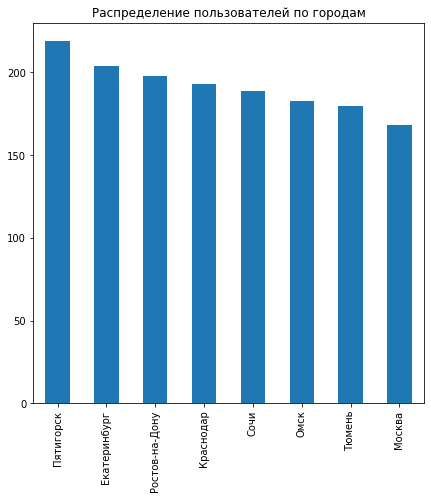

In [ ]:
#users['city'].value_counts().plot (kind = 'pie', y = count_city, autopct = '%1.0f%%',figsize=(7,7), title = 'Распределение пользователей по городам')
users['city'].value_counts().plot(kind = 'bar', y = count_city, figsize=(7,7), title = 'Распределение пользователей по городам')

Частота встречаемости городов

Количество пользователей по городам распределено примерно одинаково, нет выдающихся значений. Лидером по количеству пользователей является Пятигорск - 219 пользователей. Меньше всего пользователей в Москве - 168. Связано это скорее всего с тем, что Пятигорск по размерам в несколько раз меньше Москвы, т.е. в Пятигорске удобнее брать самокат, чтобы куда-то добраться.

3.2 соотношение пользователей с подпиской и без подписки

In [ ]:
count_sub = users['subscription_type'].value_counts()
count_sub

free     835
ultra    699
Name: subscription_type, dtype: int64

<AxesSubplot:title={'center':'Процентное соотношение пользователей в зависимости от тарифа'}, ylabel='subscription_type'>

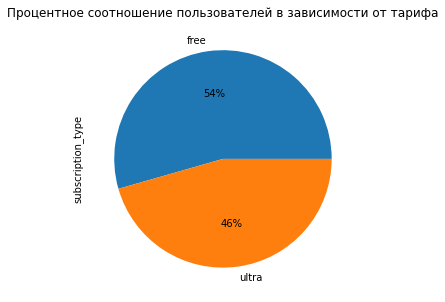

In [ ]:
users['subscription_type'].value_counts().plot(kind = 'pie', y = count_sub, autopct = '%1.0f%%', figsize=(5,5), title = 'Процентное соотношение пользователей в зависимости от тарифа')

#users['subscription_type'].value_counts().plot(kind = 'bar', y = count_city, figsize=(7,7), title = 'Процентное соотношение пользователей в зависимости от тарифа')

Соотношение пользователей с подпиской и без подписки

Пользователей, использующих бесплатную подписку больше - 835 человек, что 54% от общего числа пользователей. На платной подписке сидит 699 пользователей, что соответственно 46%.

3.3 возраст пользователей

In [ ]:
#самые маленькие
print(users['age'].min())
#самые взрослые
print(users['age'].max())

12
43


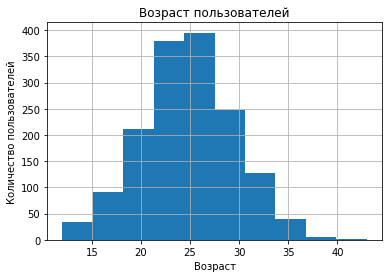

In [ ]:
plt.hist(users['age'], bins = 10)
plt.title('Возраст пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.grid()
plt.show()

Возраст пользователей

Самыми младшими являются пользователи 12 лет.
Самыми старшими - 43.

В среднем указывают возраст от 23 до 28 лет.

3.4 расстояние, которое пользователь преодолел за одну поездку

In [ ]:
# самые короткие дистанции
rides['distance'].sort_values().head()

11555    0.855683
9541     2.570787
13690    4.329506
8658     6.784447
7841     7.097072
Name: distance, dtype: float64

In [ ]:
# самые длиные дистанции
rides['distance'].sort_values(ascending=False).head()

16309    7211.007745
16484    7066.003772
15580    6908.491343
17171    6760.940067
17242    6724.932981
Name: distance, dtype: float64

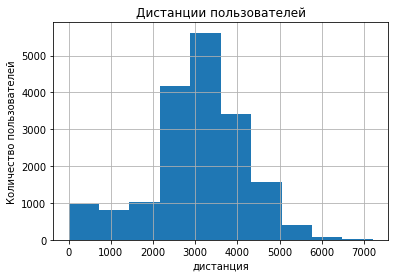

In [ ]:
plt.hist(rides['distance'], bins = 10)
plt.title('Дистанции пользователей')
plt.xlabel('дистанция')
plt.ylabel('Количество пользователей')
plt.grid()
plt.show()

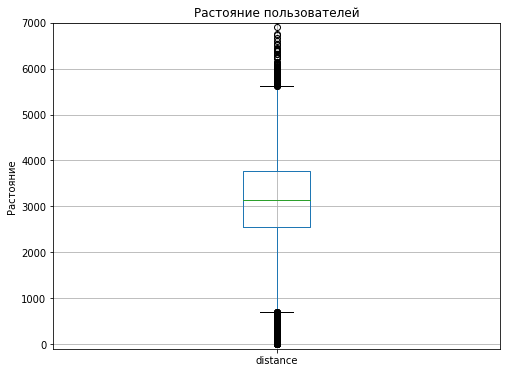

In [ ]:
rides.boxplot(column ='distance', figsize=(8, 6))
plt.title('Растояние пользователей')
plt.ylim(-100,7000)
plt.ylabel('Растояние')
plt.show()

Расстояние, которое пользователь преодолел за одну поездку

Самая короткая дистанция - 0.86 км
Самая длинная - 7.2 км
В основном пользователи проезжают от 2.3 км до 4.4 км.

3.5 продолжительность поездок

In [ ]:
# Самые короткие поездки
rides['duration'].sort_values().head()

12013    0.5
17314    0.5
15029    0.5
7437     0.5
12967    0.5
Name: duration, dtype: float64

In [ ]:
# Самые длиные поездки
rides['duration'].sort_values(ascending=False).head()

4215    40.823963
4709    39.873856
2623    39.526602
1998    38.352763
6453    38.265229
Name: duration, dtype: float64

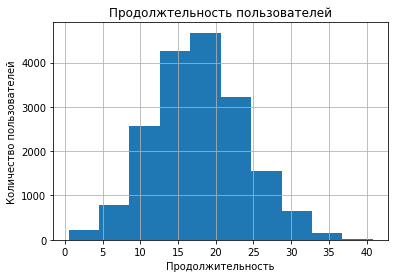

In [ ]:
plt.hist(rides['duration'], bins = 10)
plt.title('Продолжтельность пользователей')
plt.xlabel('Продолжительность')
plt.ylabel('Количество пользователей')
plt.grid()
plt.show()

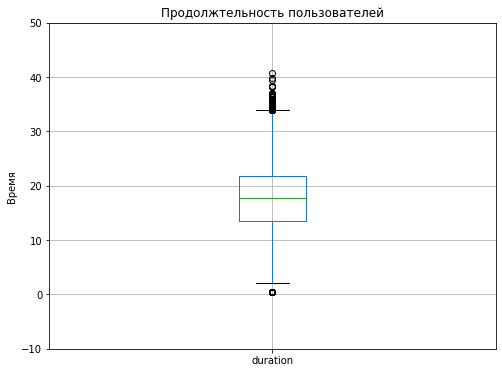

In [ ]:
rides.boxplot(column ='duration', figsize=(8, 6))
plt.title('Продолжтельность пользователей')
plt.ylim(-10,50)
plt.ylabel('Время')
plt.show()

Продолжительность поездок

Самые короткие поездки - по пол минуты. Выглядят странно, возможно техническая неинсправность самого самоката.
Самая длинная поездка заняла 40 минут.
В основном же длительность поездки состовляет 13 - 22 минут.

#### Шаг 4. Объединение данных

4.1 Объедините данные о пользователях, поездках и подписках в один датафрейм.

In [ ]:
# размеры датасетов до объединения
print(f'Размер талицы пользователей {users.shape}')
print(f'Размер таблицы с поездакми {rides.shape}')
print(f'Разммер таблицы по подпискам {subscriptions.shape}')

Размер талицы пользователей (1534, 5)
Размер таблицы с поездакми (18068, 5)
Разммер таблицы по подпискам (2, 4)


In [ ]:
data = users.merge(rides)
data = data.merge(subscriptions)
data.head(20)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
5,1,Кира,22,Тюмень,ultra,2770.890808,16.650138,2021-10-09,10,6,0,199
6,1,Кира,22,Тюмень,ultra,3039.020292,14.927879,2021-10-19,10,6,0,199
7,1,Кира,22,Тюмень,ultra,2842.118050,23.117468,2021-11-06,11,6,0,199
8,1,Кира,22,Тюмень,ultra,3412.690668,15.238072,2021-11-14,11,6,0,199
9,1,Кира,22,Тюмень,ultra,748.690645,15.041884,2021-11-22,11,6,0,199


In [ ]:
# размер объединенных таблиц
data.shape

(18068, 12)

4.2 Создадим ещё два датафрейма из датафрейма, созданного на этапе 4.1:

С данными о пользователях без подписки

In [ ]:
free_sub = data.query("`subscription_type` == 'free'")
free_sub

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


C данными о пользователях с подпиской.

In [ ]:
ultra_sub = data.query("`subscription_type` == 'ultra'")
ultra_sub.head(20)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
5,1,Кира,22,Тюмень,ultra,2770.890808,16.650138,2021-10-09,10,6,0,199
6,1,Кира,22,Тюмень,ultra,3039.020292,14.927879,2021-10-19,10,6,0,199
7,1,Кира,22,Тюмень,ultra,2842.118050,23.117468,2021-11-06,11,6,0,199
8,1,Кира,22,Тюмень,ultra,3412.690668,15.238072,2021-11-14,11,6,0,199
9,1,Кира,22,Тюмень,ultra,748.690645,15.041884,2021-11-22,11,6,0,199


4.3 Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий.

Визуализация о расстоянии и времени поездок для free_sub (без подписки)

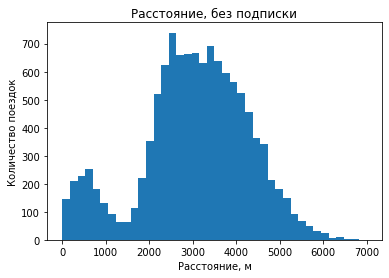

<Figure size 1440x1440 with 0 Axes>

In [ ]:
# Визуализируем информацию о расстоянии без подписки
plt.hist(free_sub['distance'], bins=40, range = (0, 7000))
plt.title('Расстояние, без подписки')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество поездок')
plt.figure(figsize=(20,20))
plt.show()

Без подписки расстояние которые пользователи проезжают от 1,9 до 4,8 км, есть пользователи, которые проехали даже 6, 6.5 км.

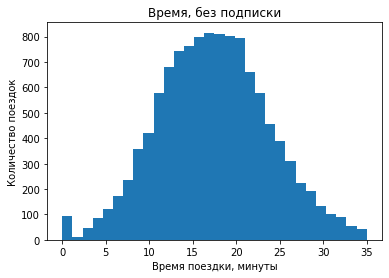

<Figure size 1440x1440 with 0 Axes>

In [ ]:
# Визуализируем информацию о времени без подписки
plt.hist(free_sub['duration'], bins=30, range = (0, 35))
plt.title('Время, без подписки')
plt.xlabel('Время поездки, минуты')
plt.ylabel('Количество поездок')
plt.figure(figsize=(20,20))
plt.show()

Без подписки время поездки составляет от 10 до 30 минут, так же можем наблюдать значение около 0 возможно, люди собиралсь поехать, но потом передумали

Визуализация о расстоянии и времени поездок для ultra_sub (с подпиской)

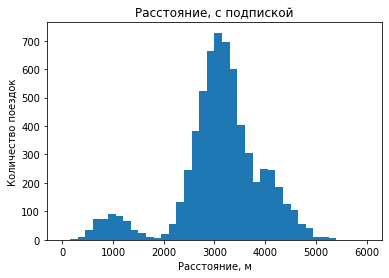

<Figure size 1440x1440 with 0 Axes>

In [ ]:
# Визуализируем информацию о расстоянии с подпиской
plt.hist(ultra_sub['distance'], bins=40, range = (0, 6000))
plt.title('Расстояние, с подпиской')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество поездок')
plt.figure(figsize=(20,20))
plt.show()

С подпиской пик расстояния приходится на 3км. В среднем расстояние которое преодаливают пользователи от 2,5 до 3,8 км

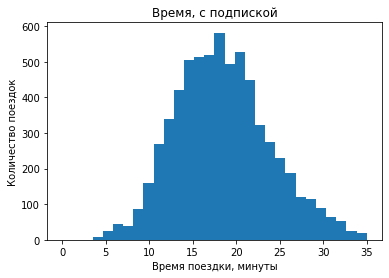

<Figure size 1440x1440 with 0 Axes>

In [ ]:
# Визуализируем информацию о времени с полпиской
plt.hist(ultra_sub['duration'], bins=30, range = (0, 35))
plt.title('Время, с подпиской')
plt.xlabel('Время поездки, минуты')
plt.ylabel('Количество поездок')
plt.figure(figsize=(20,20))
plt.show()

С подпиской среднее время укладывается в промежуток от 13 до 25 минут.

Вывод

Объединили данные о пользователях, поездках и подписках в один датафрейм - data.

Выделили два датафрейма на основе data:

free_sub - Информация о пользователях без подписки
ultra_sub - Информация о пользователях с подпиской
Визуализировали информацию о расстоянии и времени для каждого из тарифов.

Без подписки время поездки составляет от 10 до 30 минут, и проезжают от 1,9 до 4,8 км, есть пользователи, которые проехали даже 6, 6.5 км.

С подпиской время укладывается в промежуток от 13 до 25 минут. Пик расстояния приходится на 3км.

Таким образом, можно сделать вывод, что пользователи без подписки в целом совершают более долгие поездки, а также проезжают большее расстояние, чем пользователи с подпиской.

#### Шаг 5. Подсчёт выручки

5.1 Создайте датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдите суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

Найдем суммарное расстояние, количество поeздок и суммарное время для каждого пользователя за каждый месяц

In [ ]:
data.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

перед групировкой проверили нет ли пропусков в новом датафрейме

In [ ]:
data['duration'] = np.ceil(data['duration'])

In [ ]:
#gg_data = data.pivot_table(index=['month', 'user_id'], values = ['distance', 'duration', 'name', 'subscription_type'], aggfunc = {'distance': sum, 'duration' : sum, 'name' : len, 'subscription_type' : min})

gg_data = data.groupby(['user_id','month']).agg({'distance':'sum', 'user_id':'count', 'duration':'sum', 'subscription_type':'first'})
gg_data.columns = ['distance','rides','duration', 'subscription_type']
gg_data.head(10)

distance  rides  duration subscription_type
user_id month                                                 
1       1       7027.511294      2      42.0             ultra
        4        754.159807      1       7.0             ultra
        8       6723.470560      2      46.0             ultra
        10      5809.911100      2      32.0             ultra
        11      7003.499363      3      56.0             ultra
        12      6751.629942      2      28.0             ultra
2       3      10187.723006      3      63.0             ultra
        4       6164.381824      2      40.0             ultra
        6       3255.338202      1      14.0             ultra
        7       6780.722964      2      48.0             ultra

In [ ]:
# проверяем
gg_data.query('user_id == 1')

distance  rides  duration subscription_type
user_id month                                                
1       1      7027.511294      2      42.0             ultra
        4       754.159807      1       7.0             ultra
        8      6723.470560      2      46.0             ultra
        10     5809.911100      2      32.0             ultra
        11     7003.499363      3      56.0             ultra
        12     6751.629942      2      28.0             ultra

In [ ]:
gg_data.query('user_id == 52')

distance  rides  duration subscription_type
user_id month                                                
52      2      3056.954111      1      19.0             ultra
        3      2855.937631      1      23.0             ultra
        4      5770.562487      2      44.0             ultra
        10     3747.336373      1      29.0             ultra

5.2 В этот же датафрейм добавим столбец с помесячной выручкой, которую принёс каждый пользователь.

In [ ]:
#gg = (data['start_ride_price'] * gg_data['rides']) + (data['minute_price' * 'duration']) + data['subscription_fee']
def revenue(gg):
    if gg['subscription_type'] == 'ultra':
        return 6 * gg['duration'] + 199
    elif gg['subscription_type'] == 'free':
        return 8 * gg['duration'] + 50 * gg['rides']
gg_data['revenue_month'] = gg_data.apply(revenue, axis=1)
gg_data['revenue_month'] = np.ceil(gg_data['revenue_month'])
gg_data.head()

distance  rides  duration subscription_type  revenue_month
user_id month                                                               
1       1      7027.511294      2      42.0             ultra          451.0
        4       754.159807      1       7.0             ultra          241.0
        8      6723.470560      2      46.0             ultra          475.0
        10     5809.911100      2      32.0             ultra          391.0
        11     7003.499363      3      56.0             ultra          535.0

Вывод

Создали новый датафрейм с агрегированными данными (gg_data) на основе датафрейма с объединенными данными (data).

Нашли суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц. Также добавили столбец с помесячной выручкой, которую принес каждый пользователь.

#### Шаг 6. Проверка гипотез

6.1 Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

Проверим гипотезу: пользователи с подпиской тратят больше времени на поездки, чем пользователи на бесплатном тарифе.

alpha = 0.05

0: Время продолжительность сессии пользователей на подписке ultra = время продолжительность сессии пользователей на подписке free

1: Время продолжительность сессии пользователей на подписке ultra > время продолжительность сессии пользователей на подписке free


In [ ]:
ultra = ultra_sub['duration']

free = free_sub['duration']

results = st.ttest_ind(ultra, free, alternative='greater')

alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

1.2804098316645618e-34
Отвергаем нулевую гипотезу


Вывод

Проверили гипотезу, мы можем почти отвергнуть гипотезу о том, что время поездки пользователей на тарифе ultra равно времени поездки пользователей на тарифе free.

6.2 Расстояние одной поездки в
3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает
3130 метров? Проверьте гипотезу и сделайте выводы.

Проверим гипотезу: пользователи с подпиской проезжают расстояние, не превышающее 3130 метров за одну поездку.

alpha = 0.05

0: Расстояние пользователей на подписке ultra = 3130 метров

1: Расстояние пользователей на подписке ultra < 3130 метров

In [ ]:
ultra = ultra_sub['distance']

interested_value = 3130.0

alpha = 0.05

results = st.ttest_1samp(ultra, interested_value, alternative='greater')

print(results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

0.9195368847849785
Не удалось отвергнуть нулевую гипотезу


Вывод

Проверили гипотезу, и мы не можем утверждать, что расстояние, которое проехали пользователи на тарифе ultra не превышает 3130 метров. хотя и очень близко находится к этому значению

6.3. Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.

Проверим гипотезу: помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки

alpha = 0.05

0: Выручка пользователей на подписке ultra = выручка пользователей на подписке free

1: Выручка пользователей на подписке ultra > выручка пользователей на подписке free

In [ ]:
ultra = gg_data.loc[gg_data.subscription_type == 'ultra', 'revenue_month']

free = gg_data.loc[gg_data.subscription_type == 'free', 'revenue_month']


results = st.ttest_ind(ultra, free, alternative = 'greater')

alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

1.8850394384715216e-31
Отвергаем нулевую гипотезу


Вывод

Проверили гипотезу, соответственно, мы можем утверждать, что выручка на подписке ultra превышает выручку на подписке free

6.4. Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Чтобы проверить гипотезу о равенстве среднего генеральной совокупности для зависимых (парных) выборок в Python

Гипотезы в таком случае будут сформулированы так:

где μ1 и μ2 - средние значения количество обращений в техподдержку до и после изменения.

1: μ1 = μ2

2: μ1 != μ2

Метод для сравнения: scipy.stats.ttest_rel()

####  шаг. Вывод

Загрузили 3 датафрейма: с пользователями, информацией о поездках, информацией о подписках.

Дальше проверили данные на пропуски, их не оказалось ни в одной таблице. Поменяли тип данных у столбца date из датафрейма rides к типу даты. Также добавили столбец month с номером месяца. И удалили дубликаты строк из датафрейма с пользователями.

Провели исследовательский анализ данных:

Вывели, что количество пользователей по городам распределено примерно одинаково, нет выдающихся значений. Лидером по количеству пользователей является Пятигорск - 219 пользователей. Меньше всего пользователей в Москве - 168.
Пользователей, использующих бесплатную подписку больше - 835 человек, что 54% от общего числа пользователей. На платной подписке сидит 699 пользователей, что соответственно 46%.


Самыми младшими являются пользователи 12 лет. Самыми старшими - 43.

В среднем указывают возраст от 23 до 28 лет.

Самая короткая дистанция - 0.86 км. Самая длинная - 7.2 км В основном пользователи проезжают от 2.3 км до 4.4 км.

Чаще всего длительность поездки состовляет 13 - 22 минут

Объединили данные о пользователях, поездках и подписках в один датафрейм. На основе объединенного датафрейма создали еще 2 датафрейма:

Для пользователей с ultra подпиской
Для пользователей с free подпиской
Дальше визуализировали информацию о расстоянии и времени поездки для пользоватей каждого тарифа.

Для бесплатного тарифа время поездки составляет от 10 до 30 минут, и проезжают от 2 до 5 км, есть пользователи, которые проехали даже 6, 6.5 км.
Платный тариф. В основном время укладывается в промежуток от 15 до 25 минут. Пик расстояния приходится на 3км.
Нашли суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц - вывели все данные в отдельный датафрейм total_data. Добавили в датафрейм total_data столбец с помесячной выручкой revenue_per_month.

Проверили гипотезы:

Пользователи с подпиской тратят больше времени на поездки, чем пользователи на бесплатном тарифе
Отвергли нулевую гипотезу
Пользователи с подпиской проезжают расстояние, не превышающее 3130 метров за одну поездку
Не удалось отвергнуть нулевую гипотезу
Помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки
Отвергли нулевую гипотезу

По данным котрые мы получили можно создать еще несколько иследований. Котрые мы можем сделать для лучшего сервиса по аренде самокатов. Например:

В каких городах больше пользователей с подпиской, без подписки

В какую возрастную группу больше приходится людей с подпиской

На какой расстояние пользователи разной возрастной группы проезжают